In [371]:
# imports
import pandas as pd
import numpy as np
from dateutil import parser

In [372]:
# configs
import warnings
warnings.filterwarnings("ignore")

In [373]:
# read csvs & build dataframe
df = pd.DataFrame()
df_temp = pd.read_csv('./datasets/temperatura_featured.csv')
df_vendas = pd.read_csv('./datasets/vendas.csv', ';')
df_conc = pd.read_csv('./datasets/concorrentes.csv', ';')

In [374]:
# pre-processing
def get_dias_fechados():
    return ['2018-02-12', '2018-02-13', '2018-03-30', '2018-11-02', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01', '2019-03-03', '2019-03-04', '2019-03-05', '2019-04-19', '2019-11-02', '2019-12-25', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01', '2020-02-24', '2020-02-25']

def get_dias_fds():
    return ['Sunday', 'Saturday']

def get_dias_feriados():
    return ['2018-02-12', '2018-02-13', '2018-03-30', '2018-04-21', '2018-04-30', '2018-05-01', '2018-05-31', '2018-06-01', '2018-09-07', '2018-10-12', '2018-11-02', '2018-11-15', '2018-11-16', '2018-12-24', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', 
'2019-01-01', '2019-03-04', '2019-03-05', '2019-04-19', '2019-04-21', '2019-05-01', '2019-06-20', '2019-06-21', '2019-09-07', '2019-10-12', '2019-11-02', '2019-11-15', '2019-12-25', '2019-12-25', '2019-12-25', '2019-12-30', '2019-12-31', 
'2020-01-01', '2020-02-24', '2020-02-25']

def get_dias_festivos():
    return ['2018-02-12', '2018-02-13', '2018-05-13', '2018-08-12', '2018-12-25', '2018-12-29', '2018-12-30', '2018-12-31', '2019-01-01', '2019-03-03', '2019-03-04', '2019-03-05', '2019-05-12', '2019-08-11', '2019-12-25', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01', '2020-02-24', '2020-02-25']

def get_vesperas_dias_festivos():
    vesperas = []
    for i in range(len(get_dias_festivos())):
        vesperas_dia_festivo_current = pd.Series(pd.date_range(end=get_dias_festivos()[i], periods=5, closed='left'))
        for j in range(len(vesperas_dia_festivo_current)):
            for o in range(len(get_dias_festivos())):
                if (vesperas_dia_festivo_current[j] != get_dias_festivos()[o]):
                    vesperas.append(vesperas_dia_festivo_current[j])
    return vesperas

def get_pos_dias_festivos():
    pos = []
    for i in range(len(get_dias_festivos())):
        pos_dia_festivo_current = pd.Series(pd.date_range(get_dias_festivos()[i], periods=3, closed='right'))
        for j in range(len(pos_dia_festivo_current)):
            for o in range(len(get_dias_festivos())):
                if (pos_dia_festivo_current[j] != get_dias_festivos()[o]):
                    pos.append(pos_dia_festivo_current[j])
    return pos

def get_dias_acerca_pagamento():
    return [5,6,7,8,9,10,28,29,30,31]

def get_meses_baixas_temporadas():
    return [1, 2]

# preprocessing
df.insert(loc=0, column='DATA', value=(pd.to_datetime(df_vendas['DATA'], dayfirst=True)))
df.insert(loc=1, column='VENDAS', value=(df_vendas['VENDAS'].fillna(0).astype(int)))
df.insert(loc=2, column='FECHADO', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_fechados())).astype(int))
df.insert(loc=3, column='ABERTO', value=(~pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_fechados())).astype(int))
df.insert(loc=4, column='FDS', value=(pd.DatetimeIndex(df_temp['DATA']).day_name().isin(get_dias_fds())).astype(int))
df.insert(loc=5, column='DS', value=(~pd.DatetimeIndex(df_temp['DATA']).day_name().isin(get_dias_fds())).astype(int))
df.insert(loc=6, column='DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_festivos())).astype(int))
df.insert(loc=7, column='VESPERA_DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_vesperas_dias_festivos())).astype(int))
df.insert(loc=8, column='POS_DATA_FESTIVA', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_pos_dias_festivos())).astype(int))
df.insert(loc=9, column='DATA_NAO_FESTIVA', value=((~pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_festivos())) & (~pd.DatetimeIndex(df_temp['DATA']).isin(get_vesperas_dias_festivos())) & (~pd.DatetimeIndex(df_temp['DATA']).isin(get_pos_dias_festivos()))).astype(int))
df.insert(loc=10, column='FERIADO', value=(pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_feriados())).astype(int))
df.insert(loc=11, column='NAO_FERIADO', value=(~pd.DatetimeIndex(df_temp['DATA']).isin(get_dias_feriados())).astype(int))
df.insert(loc=12, column='SEMANA_PAGAMENTO', value=(pd.DatetimeIndex(df_temp['DATA']).day.astype(int).isin(get_dias_acerca_pagamento())).astype(int))
df.insert(loc=13, column='SEMANA_DE_NAO_PAGAMENTO', value=(~pd.DatetimeIndex(df_temp['DATA']).day.astype(int).isin(get_dias_acerca_pagamento())).astype(int))
df.insert(loc=14, column='BAIXA_TEMPORADA', value=(pd.DatetimeIndex(df_temp['DATA']).month.isin(get_meses_baixas_temporadas())).astype(int))
df.insert(loc=15, column='ALTA_TEMPORADA', value=(~pd.DatetimeIndex(df_temp['DATA']).month.isin(get_meses_baixas_temporadas())).astype(int))
df.insert(loc=16, column='QTD_CONCORRENTES', value=(df_conc['CONCORRENTES'].fillna(0).astype(int)))
df.insert(loc=17, column='PRECIPITACAO', value=(df_temp['PRECIPITACAO']))
df.insert(loc=18, column='TEMPERATURA', value=(df_temp['TEMPERATURA']))
df.insert(loc=19, column='UMIDADE', value=(df_temp['UMIDADE']))

# removing outliers
df = df.query('FECHADO == 0 and ABERTO == 1')
df = df.drop(columns=['FECHADO', 'ABERTO'])
df = df.query('VENDAS < 225')

In [375]:
pd.set_option('display.max_rows', 50)

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 751
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DATA                     728 non-null    datetime64[ns]
 1   VENDAS                   728 non-null    int64         
 2   FDS                      728 non-null    int64         
 3   DS                       728 non-null    int64         
 4   DATA_FESTIVA             728 non-null    int64         
 5   VESPERA_DATA_FESTIVA     728 non-null    int64         
 6   POS_DATA_FESTIVA         728 non-null    int64         
 7   DATA_NAO_FESTIVA         728 non-null    int64         
 8   FERIADO                  728 non-null    int64         
 9   NAO_FERIADO              728 non-null    int64         
 10  SEMANA_PAGAMENTO         728 non-null    int64         
 11  SEMANA_DE_NAO_PAGAMENTO  728 non-null    int64         
 12  BAIXA_TEMPORADA          728 non-nul

In [377]:
df.describe()

,VENDAS,FDS,DS,DATA_FESTIVA,VESPERA_DATA_FESTIVA,POS_DATA_FESTIVA,DATA_NAO_FESTIVA,FERIADO,NAO_FERIADO,SEMANA_PAGAMENTO,SEMANA_DE_NAO_PAGAMENTO,BAIXA_TEMPORADA,ALTA_TEMPORADA,QTD_CONCORRENTES,PRECIPITACAO,TEMPERATURA,UMIDADE
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,126.825549,0.282967,0.717033,0.004121,0.046703,0.030220,0.924451,0.021978,0.978022,0.304945,0.695055,0.178571,0.821429,10.038462,4.059890,26.128984,75.899382
std,24.881641,0.450750,0.450750,0.064106,0.211148,0.171309,0.264458,0.146712,0.146712,0.460701,0.460701,0.383256,0.383256,1.188507,9.903319,5.749055,10.502190
min,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,10.900000,48.750000
25%,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,22.200000,68.000000
50%,128.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,10.000000,0.000000,26.600000,75.750000
75%,140.250000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,11.000000,2.300000,30.100000,83.500000
max,224.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,79.400000,39.000000,97.000000


In [378]:
df.median()

VENDAS                     128.00
FDS                          0.00
DS                           1.00
DATA_FESTIVA                 0.00
VESPERA_DATA_FESTIVA         0.00
POS_DATA_FESTIVA             0.00
DATA_NAO_FESTIVA             1.00
FERIADO                      0.00
NAO_FERIADO                  1.00
SEMANA_PAGAMENTO             0.00
SEMANA_DE_NAO_PAGAMENTO      1.00
BAIXA_TEMPORADA              0.00
ALTA_TEMPORADA               1.00
QTD_CONCORRENTES            10.00
PRECIPITACAO                 0.00
TEMPERATURA                 26.60
UMIDADE                     75.75
dtype: float64

In [379]:
print(df.isnull().values.any())
print(df.isna().values.any())

False
False


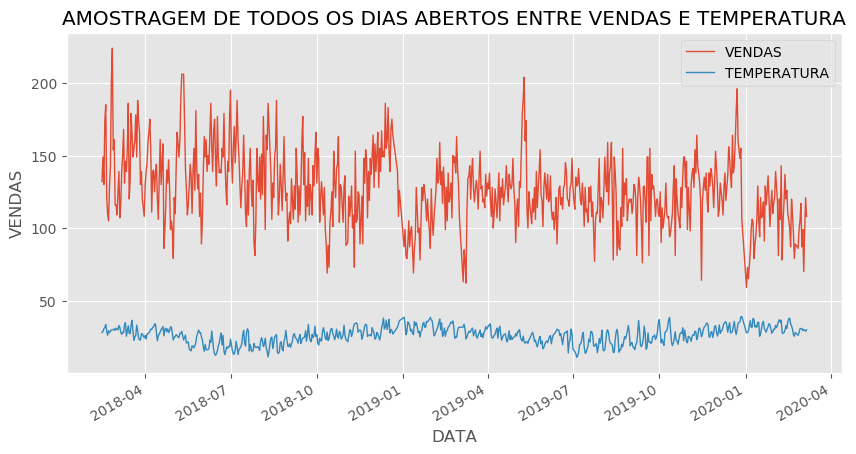

In [380]:
import mpld3
import matplotlib.style as style
import matplotlib.pyplot as plt
mpld3.enable_notebook()

df.plot(y=['VENDAS', 'TEMPERATURA'], x='DATA', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=1)
plt.legend(loc=1)
plt.title('AMOSTRAGEM DE TODOS OS DIAS ABERTOS ENTRE VENDAS E TEMPERATURA')
plt.xlabel('DATA')
plt.ylabel('VENDAS')
plt.show()

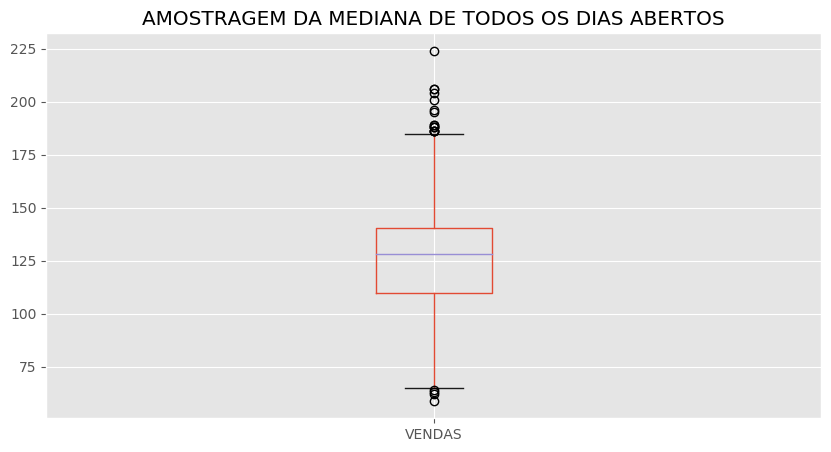

In [381]:
df.plot(y='VENDAS', x='DATA', figsize=(10, 5), kind='box')
plt.title('AMOSTRAGEM DA MEDIANA DE TODOS OS DIAS ABERTOS')
plt.show()

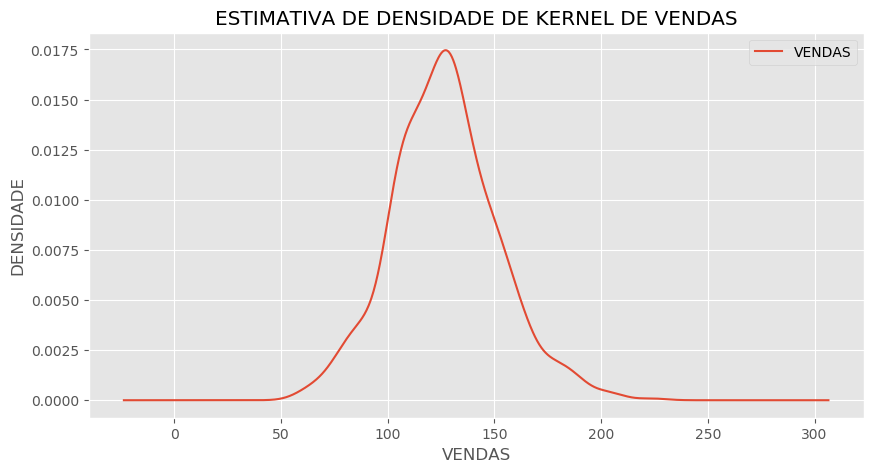

In [382]:
df.plot(y='VENDAS', x='DATA', figsize=(10, 5), kind='kde')
plt.legend(loc=1)
plt.title('ESTIMATIVA DE DENSIDADE DE KERNEL DE VENDAS')
plt.xlabel('VENDAS')
plt.ylabel('DENSIDADE')
plt.show()

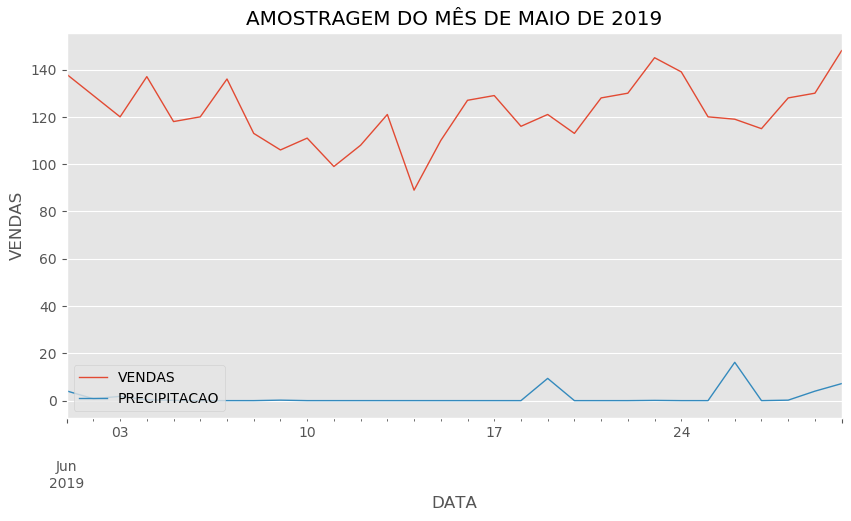

In [383]:
query = (df['DATA'] >= "2019-06-01") & (df['DATA'] <= "2019-06-30")
df2 = df.loc[query]
df2.sort_values(by=['DATA'], inplace=True, ascending=True)
df2.plot(y=['VENDAS', 'PRECIPITACAO'], x='DATA', figsize=(10, 5), linestyle='solid', linewidth=1, markersize=1)
plt.legend(loc=3)
plt.title('AMOSTRAGEM DO MÊS DE MAIO DE 2019')
plt.xlabel('DATA')
plt.ylabel('VENDAS')
plt.show()

In [384]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# featured engineering
X = df.drop(columns=['DATA', 'VENDAS'])
y = df.drop(columns=['DATA', 'FDS', 'DS', 'DATA_FESTIVA', 'VESPERA_DATA_FESTIVA', 'POS_DATA_FESTIVA', 'DATA_NAO_FESTIVA', 'FERIADO', 'NAO_FERIADO', 'SEMANA_PAGAMENTO', 'SEMANA_DE_NAO_PAGAMENTO', 'BAIXA_TEMPORADA', 'ALTA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 'TEMPERATURA', 'UMIDADE'])

# shuffled and splitted into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

#feature scaling
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

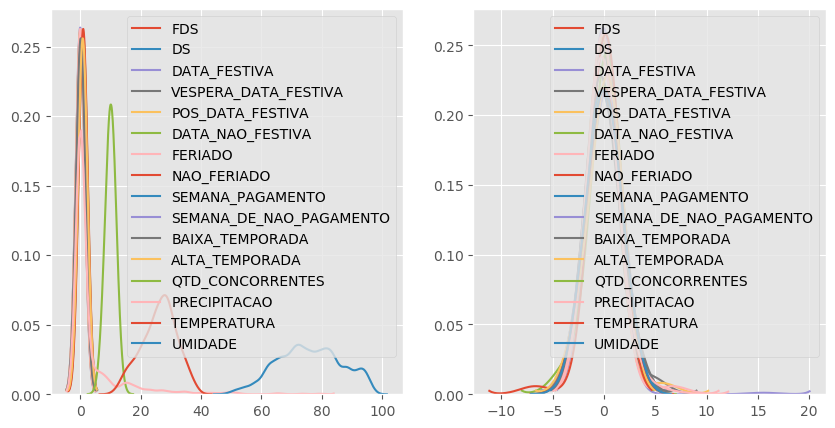

In [385]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.style.use('ggplot')

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=['FDS', 'DS', 'DATA_FESTIVA', 'VESPERA_DATA_FESTIVA', 'POS_DATA_FESTIVA', 'DATA_NAO_FESTIVA', 'FERIADO', 'NAO_FERIADO', 'SEMANA_PAGAMENTO', 'SEMANA_DE_NAO_PAGAMENTO', 'BAIXA_TEMPORADA', 'ALTA_TEMPORADA', 'QTD_CONCORRENTES', 'PRECIPITACAO', 'TEMPERATURA', 'UMIDADE'])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

sns.kdeplot(df['FDS'], bw=1.5, ax=ax1)
sns.kdeplot(df['DS'], bw=1.5, ax=ax1)
sns.kdeplot(df['DATA_FESTIVA'], bw=1.5, ax=ax1)
sns.kdeplot(df['VESPERA_DATA_FESTIVA'], bw=1.5, ax=ax1)
sns.kdeplot(df['POS_DATA_FESTIVA'], bw=1.5, ax=ax1)
sns.kdeplot(df['DATA_NAO_FESTIVA'], bw=1.5, ax=ax1)
sns.kdeplot(df['FERIADO'], bw=1.5, ax=ax1)
sns.kdeplot(df['NAO_FERIADO'], bw=1.5, ax=ax1)
sns.kdeplot(df['SEMANA_PAGAMENTO'], bw=1.5, ax=ax1)
sns.kdeplot(df['SEMANA_DE_NAO_PAGAMENTO'], bw=1.5, ax=ax1)
sns.kdeplot(df['BAIXA_TEMPORADA'], bw=1.5, ax=ax1)
sns.kdeplot(df['ALTA_TEMPORADA'], bw=1.5, ax=ax1)
sns.kdeplot(df['QTD_CONCORRENTES'], bw=1.5, ax=ax1)
sns.kdeplot(df['PRECIPITACAO'], bw=1.5, ax=ax1)
sns.kdeplot(df['TEMPERATURA'], bw=1.5, ax=ax1)
sns.kdeplot(df['UMIDADE'], bw=1.5, ax=ax1)

sns.kdeplot(scaled_df['FDS'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['DS'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['DATA_FESTIVA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['VESPERA_DATA_FESTIVA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['POS_DATA_FESTIVA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['DATA_NAO_FESTIVA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['FERIADO'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['NAO_FERIADO'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['SEMANA_PAGAMENTO'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['SEMANA_DE_NAO_PAGAMENTO'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['BAIXA_TEMPORADA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['ALTA_TEMPORADA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['QTD_CONCORRENTES'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['PRECIPITACAO'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['TEMPERATURA'], bw=1.5, ax=ax2)
sns.kdeplot(scaled_df['UMIDADE'], bw=1.5, ax=ax2)

plt.show()

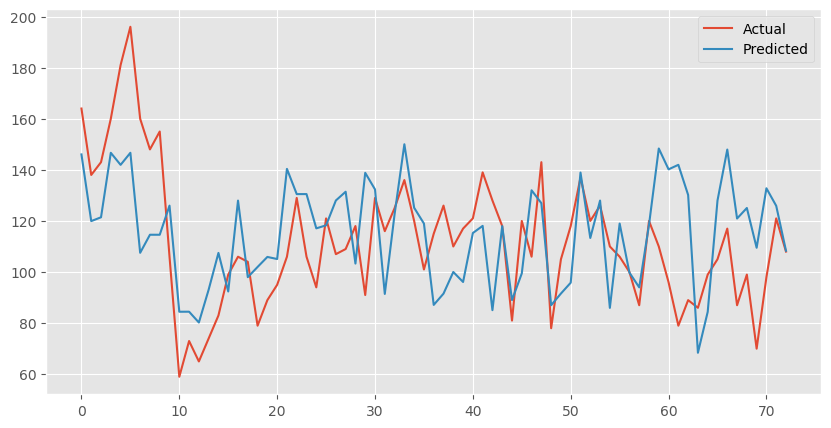

In [386]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

gb = GradientBoostingRegressor(random_state=0, n_estimators=6000, max_depth=20)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
scores = cross_val_score(gb, X_test, y_test, cv=10)
df1 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df1.plot(kind='line', figsize=(10, 5))
plt.show()

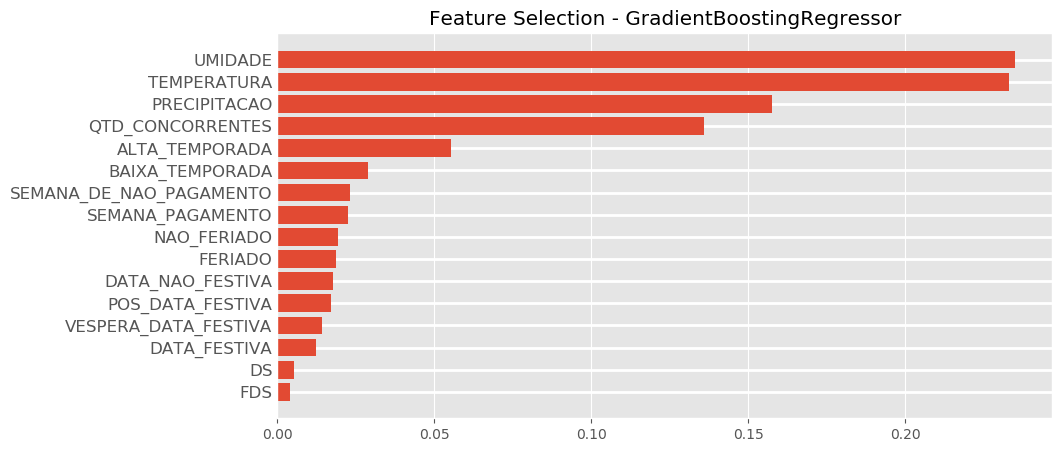

In [387]:
importances = pd.Series(gb.feature_importances_).sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(X.columns.values, importances, align='center')
ax.set_yticks(X.columns.values)
ax.set_yticklabels(X.columns.values)
ax.set_title('Feature Selection - GradientBoostingRegressor')
ax.margins(tight=True)  
plt.tick_params(axis='y', labelsize=12, direction='in', grid_linewidth=2)
plt.show()

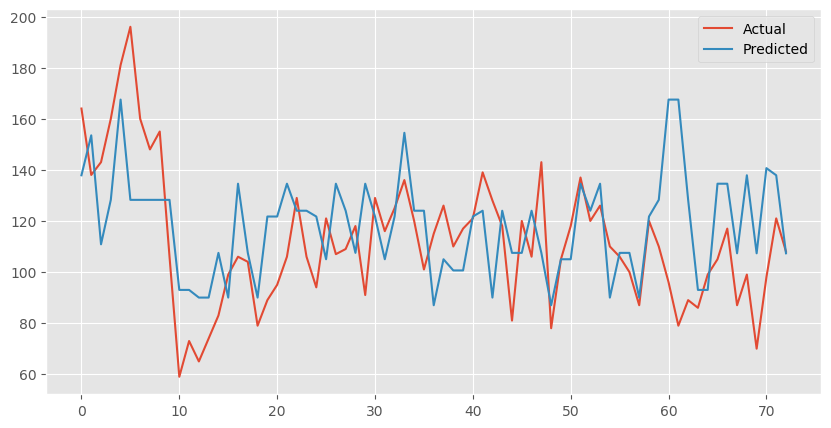

In [388]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

tree = DecisionTreeRegressor(min_samples_split=12, max_depth=600, ccp_alpha=0.0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
scores = cross_val_score(tree, X_test, y_test, cv=10)
df1 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df1.plot(kind='line', figsize=(10, 5))
plt.show()

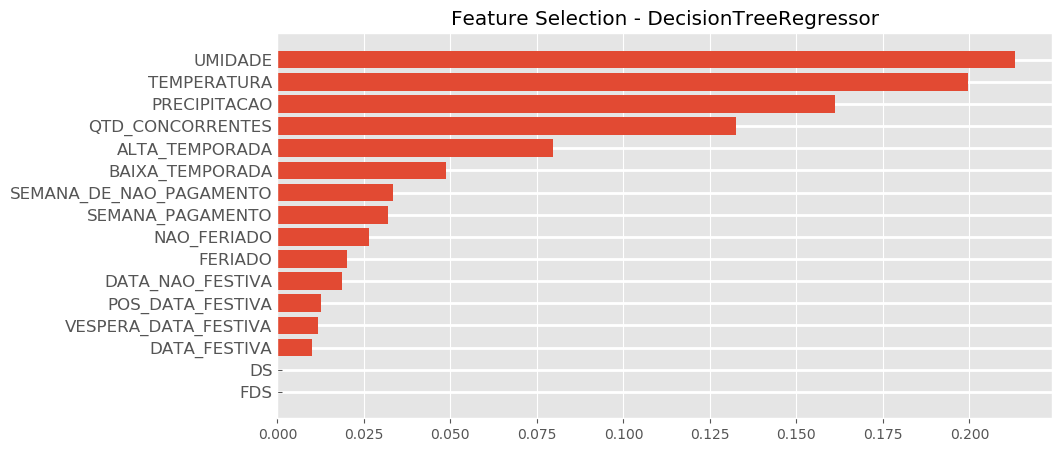

In [389]:
importances = pd.Series(tree.feature_importances_).sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(X.columns.values, importances, align='center')
ax.set_yticks(X.columns.values)
ax.set_yticklabels(X.columns.values)
ax.set_title('Feature Selection - DecisionTreeRegressor')
ax.margins(tight=True)  
plt.tick_params(axis='y', labelsize=12, direction='in', grid_linewidth=2)
plt.show()

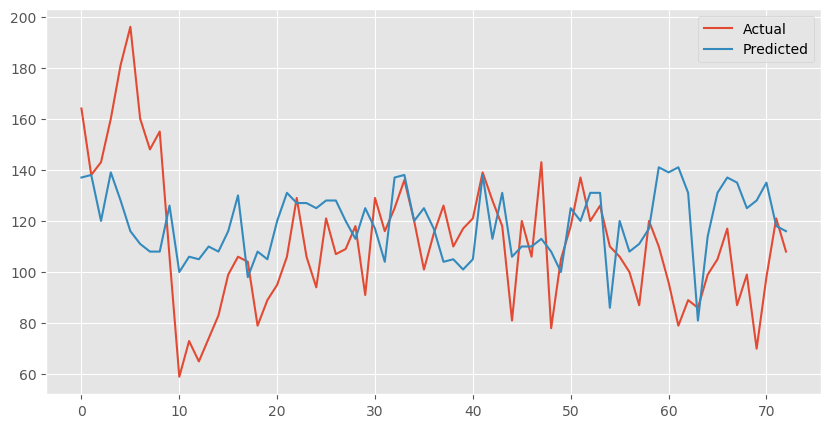

In [390]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

tree2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=800), n_estimators=1000, random_state=0, loss='square')
tree2.fit(X_train, y_train)
y_pred = tree2.predict(X_test)
scores = cross_val_score(tree2, X_test, y_test, cv=10)

df1 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df1.plot(kind='line', figsize=(10, 5))
plt.show()

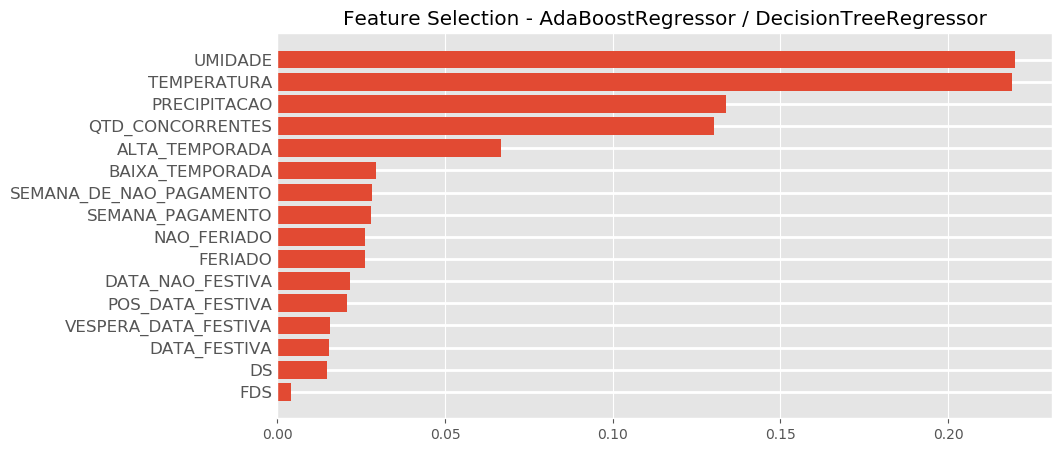

In [391]:
importances = pd.Series(tree2.feature_importances_).sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh(X.columns.values, importances, align='center')
ax.set_yticks(X.columns.values)
ax.set_yticklabels(X.columns.values)
ax.set_title('Feature Selection - AdaBoostRegressor / DecisionTreeRegressor')
ax.margins(tight=True)  
plt.tick_params(axis='y', labelsize=12, direction='in', grid_linewidth=2)
plt.show()

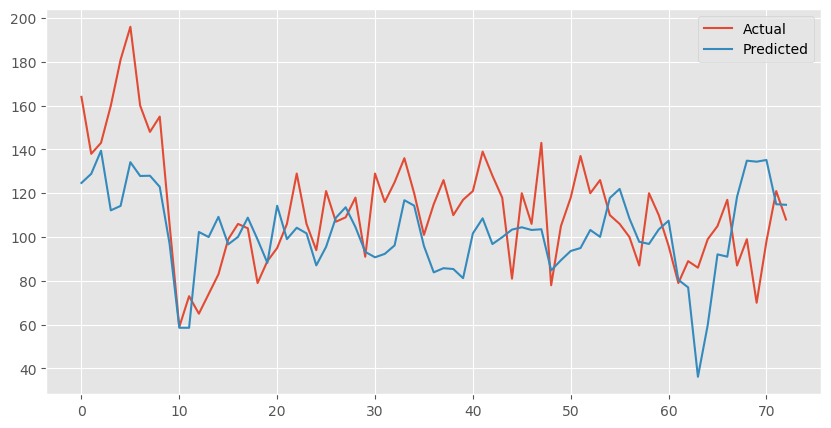

In [392]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score

nn = MLPRegressor(random_state=1, hidden_layer_sizes=17, max_iter=6000, early_stopping=True)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
scores = cross_val_score(nn, X_test, y_test, cv=10)

df1 = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df1.plot(kind='line', figsize=(10, 5))
plt.show()